In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
class Homography:
    def __init__(self, src, dst):
        self.src = src
        self.dst = dst
        self.compute_coefficents()
        self.compute_homography_matrix()


    def get_homography_matrix(self):
        return self.H

    def compute_coefficents(self):
        # print(X[:,0])
        coeffs = []
        X = self.src
        Xprime = self.dst
        for i in range(X.shape[0]):
            x = X[i]
            x_prime = Xprime[i]
            upper_coeff = np.array([-x[0],-x[1],-1,0,0,0, x_prime[0] * x[0], x_prime[0] * x[1], x_prime[0] ])
            lower_coeff = np.array([0, 0, 0, -x[0], -x[1], -1, x_prime[1] * x[0],x_prime[1] * x[1], x_prime[1] ])
            coeffs.append(upper_coeff)
            coeffs.append(lower_coeff)
        self.coeffs = np.array(coeffs)

    def compute_homography_matrix(self):
        U, s, VT = np.linalg.svd(self.coeffs)
        self.H = VT[-1].reshape(3, 3)

    def wrap_perspective(self, points):
        wrapped_pts = self.H @ points.T
        return wrapped_pts / wrapped_pts[-1:,:] #convert to homogeneous pts

In [29]:
X = np.array([[200, 150, 1], [250, 145, 1],[210, 170, 1], [255, 162, 1]]);
Xprime = np.array([[200, 150, 1], [250, 150, 1], [200, 170, 1], [250, 170, 1]]);
x_pts = np.random.rand(100) * 480
y_pts = np.random.rand(100) * 640

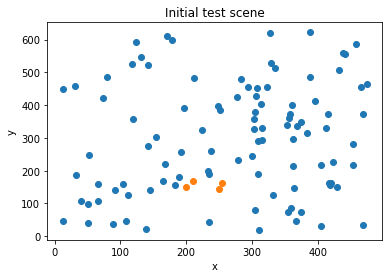

In [40]:
plt.scatter(x_pts, y_pts, label="Random points")
plt.scatter(X[:,0], X[:,1], label="Source points")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial test scene')
plt.show()

In [41]:
homography = Homography(X, Xprime)
H = homography.get_homography_matrix()
print('Est homography matrix:', H)

Est homography matrix: [[ 7.26577891e-05 -2.28489626e-03  8.90344723e-01]
 [-1.34837560e-03  1.57361475e-03  4.55239290e-01]
 [-1.06309818e-05 -5.92734595e-06  5.82600746e-03]]


In [46]:
random_homogeneous_pts = np.vstack((x_pts, y_pts, np.ones(x_pts.shape[0]))).T
wrapped_pts = homography.wrap_perspective(random_homogeneous_pts)
wrapped_src_pts = homography.wrap_perspective(X)

(50.0, 500.0)

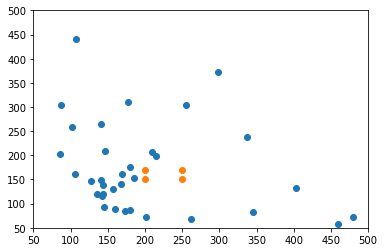

In [53]:
plt.scatter(wrapped_pts[0], wrapped_pts[1], label="Random Points");
plt.scatter(wrapped_src_pts[0], wrapped_src_pts[1], label="Homography matrix test points")
plt.xlim(50, 500)
plt.ylim(50, 500)